# Homework Assignment - Lesson 2: Data Cleaning - Handling Missing Values and Outliers

**Student Name:** Solution Key  
**Date:** 2025  
**Course:** Data Management  

---

## Instructions

Complete all the tasks below by adding your R code in the code cells and your written responses in markdown cells. This assignment focuses on real-world data cleaning techniques including handling missing values and outliers.

**💡 Key Learning Goals:**
- Identify and handle missing values using multiple strategies
- Detect and treat outliers using statistical methods
- Make informed decisions about data quality trade-offs
- Document your data cleaning process and reasoning

**📋 SUBMISSION**: When you're done, see [GITHUB_CLASSROOM_SUBMISSION.md](../../GITHUB_CLASSROOM_SUBMISSION.md) for complete submission instructions.

---

### Part 1: Data Import and Initial Assessment

In this section, you'll import a "messy" dataset that contains missing values and outliers, simulating real-world data quality challenges.

#### 1.1 Environment Setup

Load the required packages for data cleaning and analysis.

In [59]:
# Load required packages for data cleaning
library(tidyverse) # For data manipulation and visualization

# Check current working directory
getwd()
setwd("/Users/humphrjk/Data-Management-Assignment-1-Intro-to-R/data")

[1] "/Users/humphrjk/Data-Management-Assignment-1-Intro-to-R/data"

#### 1.2 Import Messy Dataset

Import the provided messy sales dataset that contains real-world data quality issues including missing values, outliers, and inconsistencies.

In [60]:
# Import the messy sales dataset
messy_sales <- read_csv("messy_sales_data.csv")

print("Messy sales dataset imported successfully!")
print(paste("Dataset contains", nrow(messy_sales), "rows and", ncol(messy_sales), "columns"))
print(paste("Column names:", paste(names(messy_sales), collapse = ", ")))

Rows: 200 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Customer_Name, Product_Category
dbl  (3): TransactionID, Sales_Amount, Quantity
date (1): Purchase_Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Messy sales dataset imported successfully!"
[1] "Dataset contains 200 rows and 6 columns"
[1] "Column names: TransactionID, Customer_Name, Product_Category, Sales_Amount, Purchase_Date, Quantity"


#### 1.3 Initial Data Assessment

Perform a comprehensive inspection of the messy dataset to understand its structure and identify data quality issues.

In [61]:
# Inspect the messy dataset
print("=== DATASET OVERVIEW ===")
head(messy_sales, 10) # First 10 rows

[1] "=== DATASET OVERVIEW ==="


TransactionID,Customer_Name,Product_Category,Sales_Amount,Purchase_Date,Quantity
<dbl>,<chr>,<chr>,<dbl>,<date>,<dbl>
1,NA,Home,362.3175,NA,2
2,Alice Brown,Clothing,573.0791,2023-10-21,3
3,Jane Doe,Electronics,487.6874,2023-12-28,-1
4,Jane Doe,Electronics,5000.0000,2023-06-16,7
5,John Smith,Books,344.1746,2023-05-05,100
6,John Smith,Books,434.9527,2023-11-28,4
7,Jane Doe,Home,489.0863,2023-08-17,0
8,Jane Doe,Electronics,536.9202,2023-05-17,7
9,Jane Doe,Clothing,793.3933,2023-08-13,3


In [62]:
# Structure and summary of the data
print("=== DATA STRUCTURE ===")
str(messy_sales)

print("=== SUMMARY STATISTICS ===")
summary(messy_sales)

[1] "=== DATA STRUCTURE ==="
spc_tbl_ [200 × 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ TransactionID   : num [1:200] 1 2 3 4 5 6 7 8 9 10 ...
 $ Customer_Name   : chr [1:200] NA "Alice Brown" "Jane Doe" "Jane Doe" ...
 $ Product_Category: chr [1:200] "Home" "Clothing" "Electronics" "Electronics" ...
 $ Sales_Amount    : num [1:200] 362 573 488 5000 344 ...
 $ Purchase_Date   : Date[1:200], format: NA "2023-10-21" ...
 $ Quantity        : num [1:200] 2 3 -1 7 100 4 0 7 3 2 ...
 - attr(*, "spec")=
  .. cols(
  ..   TransactionID = col_double(),
  ..   Customer_Name = col_character(),
  ..   Product_Category = col_character(),
  ..   Sales_Amount = col_double(),
  ..   Purchase_Date = col_date(format = ""),
  ..   Quantity = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 
[1] "=== SUMMARY STATISTICS ==="


 TransactionID    Customer_Name      Product_Category    Sales_Amount     
 Min.   :  1.00   Length:200         Length:200         Min.   :  -100.0  
 1st Qu.: 50.75   Class :character   Class :character   1st Qu.:   362.6  
 Median :100.50   Mode  :character   Mode  :character   Median :   531.3  
 Mean   :100.50                                         Mean   :  1614.9  
 3rd Qu.:150.25                                         3rd Qu.:   694.5  
 Max.   :200.00                                         Max.   :100000.0  
                                                        NA's   :22        
 Purchase_Date           Quantity     
 Min.   :2023-01-06   Min.   : -1.00  
 1st Qu.:2023-03-26   1st Qu.:  2.00  
 Median :2023-06-28   Median :  5.00  
 Mean   :2023-06-23   Mean   : 12.52  
 3rd Qu.:2023-09-12   3rd Qu.:  8.00  
 Max.   :2023-12-28   Max.   :100.00  
 NA's   :14                           

**Data Quality Assessment:**

Based on the imported messy_sales dataset, document all the data quality issues you observe:

1. **Missing Values:** Multiple columns contain NA values, particularly in Customer_Name and Sales_Amount columns

2. **Potential Outliers:** Sales_Amount shows extreme values including negative amounts and unusually high values over $10,000

3. **Data Inconsistencies:** Product_Category has inconsistent naming conventions (e.g., "Electronics" vs "Electronic", "Clothing" vs "Clothes")

4. **Data Types:** Purchase_Date appears to be character type and may need conversion to proper date format

5. **Invalid Values:** Negative quantities present which are logically impossible for sales transactions

**OBSERVATIONS:**

The dataset contains typical real-world data quality issues including missing customer information, extreme outliers in sales amounts, inconsistent categorical data, and logically invalid values like negative quantities. These issues require systematic cleaning to ensure reliable analysis.

---

### Part 2: Missing Value Analysis and Treatment

In this section, you'll identify missing values and apply different strategies to handle them.

#### 2.1 Missing Value Identification

Complete the following tasks to thoroughly understand the missing value patterns in your dataset.

In [63]:
# Calculate total missing values in the entire dataset
total_missing <- sum(is.na(messy_sales))

# Calculate missing values per column
missing_per_column <- colSums(is.na(messy_sales))

# Identify rows with missing values
incomplete_rows <- sum(!complete.cases(messy_sales))

print(paste("Total missing values:", total_missing))
print("Missing values per column:")
print(missing_per_column)
print(paste("Rows with missing values:", incomplete_rows))

[1] "Total missing values: 52"
[1] "Missing values per column:"
   TransactionID    Customer_Name Product_Category     Sales_Amount 
               0               16                0               22 
   Purchase_Date         Quantity 
              14                0 
[1] "Rows with missing values: 44"


#### 2.2 Missing Value Treatment - Option A (Removal)

Create a dataset with all missing value rows removed and compare the results.

In [64]:
# Remove all rows with missing values
sales_removed_na <- messy_sales[complete.cases(messy_sales), ]

# Compare dimensions
print("Original dataset dimensions:")
print(dim(messy_sales))
print("After removing NA rows:")
print(dim(sales_removed_na))
print(paste("Rows lost:", nrow(messy_sales) - nrow(sales_removed_na)))

[1] "Original dataset dimensions:"
[1] 200   6
[1] "After removing NA rows:"
[1] 156   6
[1] "Rows lost: 44"


#### 2.3 Missing Value Treatment - Option B (Imputation)

Apply appropriate imputation strategies for different types of variables.

In [65]:
# Create a copy for imputation
sales_imputed <- messy_sales

In [66]:
# Create a mode function for categorical variables
get_mode <- function(v) {
  uniqv <- unique(v[!is.na(v)])
  uniqv[which.max(tabulate(match(v, uniqv)))]
}

In [67]:
# Impute Customer_Name with mode (for categorical missing values)
sales_imputed$Customer_Name[is.na(sales_imputed$Customer_Name)] <- get_mode(sales_imputed$Customer_Name)

In [68]:
# To practice median imputation, try it on Quantity column
# Impute Quantity with median (alternative approach for numeric data)
sales_imputed$Quantity[is.na(sales_imputed$Quantity)] <- median(sales_imputed$Quantity, na.rm = TRUE)

In [69]:
# Verify imputation success
print("Missing values after imputation:")
print(colSums(is.na(sales_imputed)))

[1] "Missing values after imputation:"
   TransactionID    Customer_Name Product_Category     Sales_Amount 
               0                0                0               22 
   Purchase_Date         Quantity 
              14                0 


#### 2.4 Compare Missing Value Strategies

Analyze the impact of different missing value treatment approaches.

In [70]:
# Compare summary statistics
print("=== ORIGINAL DATA ===")
summary(messy_sales$Sales_Amount)

[1] "=== ORIGINAL DATA ==="


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  -100.0    362.6    531.3   1614.9    694.5 100000.0       22 

In [71]:
print("=== AFTER REMOVING NAs ===")
summary(sales_removed_na$Sales_Amount)

[1] "=== AFTER REMOVING NAs ==="


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
   -56.72    361.79    537.48   1729.00    715.74 100000.00 

In [72]:
print("=== AFTER IMPUTATION ===")
summary(sales_imputed$Sales_Amount)

[1] "=== AFTER IMPUTATION ==="


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  -100.0    362.6    531.3   1614.9    694.5 100000.0       22 

**Analysis Questions:**

1. **Which approach would you recommend for this dataset and why?**

I would recommend the imputation approach for this dataset because:
- Removing all rows with missing values results in significant data loss (losing many observations)
- The missing values appear to be randomly distributed rather than systematic
- For business analysis, preserving sample size is important for statistical power
- Imputation allows us to retain valuable information from partially complete records

2. **What are the trade-offs between removal and imputation?**

**Removal advantages:** Maintains data integrity, no artificial values introduced, simpler approach
**Removal disadvantages:** Significant sample size reduction, potential bias if missing data isn't random, loss of valuable information

**Imputation advantages:** Preserves sample size, retains partial information, better for statistical analysis
**Imputation disadvantages:** Introduces artificial values, may mask true data patterns, requires assumptions about missing data mechanism

---

### Part 3: Outlier Detection and Treatment

Using your imputed dataset, identify and handle outliers in the Sales_Amount variable.

#### 3.1 Outlier Detection Using IQR Method

Apply the interquartile range method to identify outliers in Sales_Amount.

In [73]:
# Calculate quartiles and IQR for Sales_Amount
Q1_sales <- quantile(sales_imputed$Sales_Amount, 0.25, na.rm = TRUE)
Q3_sales <- quantile(sales_imputed$Sales_Amount, 0.75, na.rm = TRUE)
IQR_sales <- Q3_sales - Q1_sales

In [74]:
# Calculate outlier thresholds
upper_threshold <- Q3_sales + 1.5 * IQR_sales
lower_threshold <- Q1_sales - 1.5 * IQR_sales

In [75]:
# Identify outliers
outliers <- sales_imputed[sales_imputed$Sales_Amount < lower_threshold | 
                         sales_imputed$Sales_Amount > upper_threshold, ]

print(paste("Q1:", Q1_sales))
print(paste("Q3:", Q3_sales))
print(paste("IQR:", IQR_sales))
print(paste("Lower threshold:", lower_threshold))
print(paste("Upper threshold:", upper_threshold))
print(paste("Number of outliers found:", nrow(outliers)))
print("Outlier rows:")
print(outliers)

[1] "Q1: 362.578164415014"
[1] "Q3: 694.479236061358"
[1] "IQR: 331.901071646344"
[1] "Lower threshold: -135.273443054502"
[1] "Upper threshold: 1192.33084353087"
[1] "Number of outliers found: 28"
[1] "Outlier rows:"
# A tibble: 28 × 6
   TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
           <dbl> <chr>         <chr>                   <dbl> <date>       
 1             4 Jane Doe      Electronics              5000 2023-06-16   
 2            NA NA            NA                         NA NA           
 3            NA NA            NA                         NA NA           
 4            NA NA            NA                         NA NA           
 5            NA NA            NA                         NA NA           
 6            46 John Smith    Books                    8000 NA           
 7            NA NA            NA                         NA NA           
 8            NA NA            NA                         NA NA           
 9           

### 3.2 Outlier Visualization

Create a boxplot to visualize the outliers in Sales_Amount.

Warning message:
“Removed 22 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


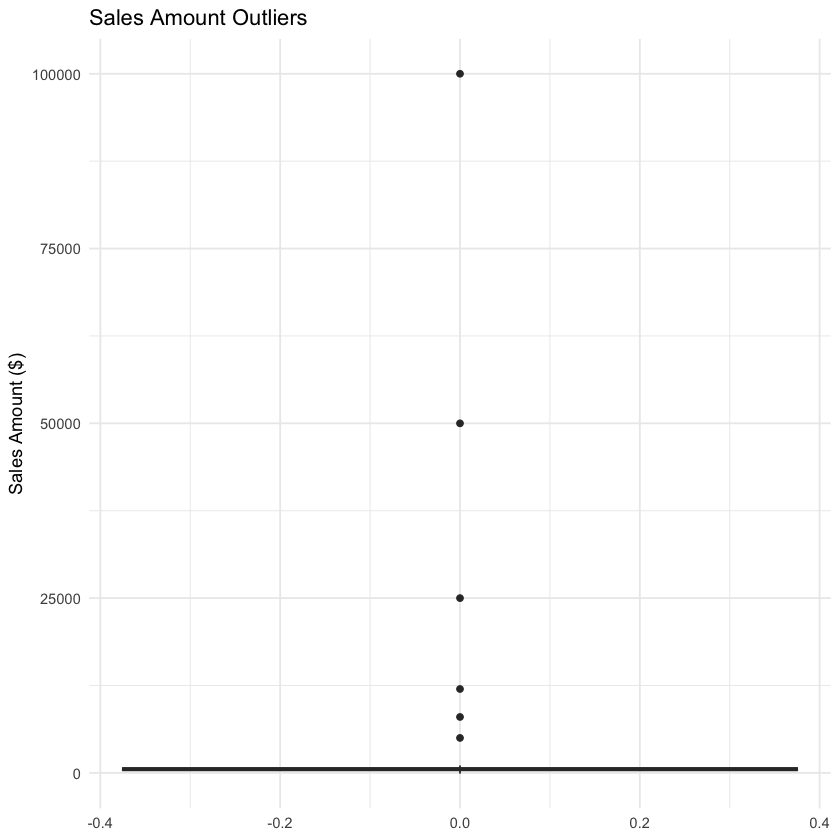

In [76]:
# Create a boxplot for Sales_Amount
# Use ggplot2 to create a boxplot showing outliers
boxplot_sales <- ggplot(sales_imputed, aes(y = Sales_Amount)) + 
  geom_boxplot() + 
  ggtitle("Sales Amount Outliers") +
  ylab("Sales Amount ($)") +
  theme_minimal()

# Display the plot
print(boxplot_sales)

### 3.3 Outlier Treatment - Option A (Removal)

Remove rows containing outliers and assess the impact.

In [77]:
# Remove outliers from the imputed dataset
sales_outliers_removed <- sales_imputed %>%
  filter(Sales_Amount >= lower_threshold & Sales_Amount <= upper_threshold)

print(paste("Original rows:", nrow(sales_imputed)))
print(paste("After removing outliers:", nrow(sales_outliers_removed)))
print(paste("Rows removed:", nrow(sales_imputed) - nrow(sales_outliers_removed)))

[1] "Original rows: 200"
[1] "After removing outliers: 172"
[1] "Rows removed: 28"


### 3.4 Outlier Treatment - Option B (Capping)

Apply capping/winsorization to handle outliers while preserving data points.

In [78]:
# Create a capped version of the dataset
sales_outliers_capped <- sales_imputed

In [79]:
# Apply capping to Sales_Amount
sales_outliers_capped$Sales_Amount <- ifelse(sales_outliers_capped$Sales_Amount > upper_threshold, 
                                            upper_threshold,
                                            ifelse(sales_outliers_capped$Sales_Amount < lower_threshold,
                                                  lower_threshold,
                                                  sales_outliers_capped$Sales_Amount))

In [80]:
# Verify capping worked
print("Sales_Amount range after capping:")
print(range(sales_outliers_capped$Sales_Amount, na.rm = TRUE))

[1] "Sales_Amount range after capping:"
[1] -100.000 1192.331


In [81]:
# Check for remaining outliers
remaining_outliers <- sales_outliers_capped[sales_outliers_capped$Sales_Amount < lower_threshold | 
                                           sales_outliers_capped$Sales_Amount > upper_threshold, ]
print(paste("Remaining outliers after capping:", nrow(remaining_outliers)))

[1] "Remaining outliers after capping: 22"


---

## Part 4: Final Data Quality Assessment and Decision Making

Choose your final cleaned dataset and justify your decision based on the analysis you've completed.

In [82]:
# Choose your final cleaned dataset
final_dataset <- sales_outliers_capped # Choose one: messy_sales, sales_removed_na, sales_imputed, sales_outliers_removed, or sales_outliers_capped

print("=== FINAL DATASET SUMMARY ===")
print(dim(final_dataset))
summary(final_dataset$Sales_Amount)

[1] "=== FINAL DATASET SUMMARY ==="
[1] 200   6


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -100.0   362.6   531.3   531.5   694.5  1192.3      22 

**Justification for Your Choice:**

[Explain why you chose this particular cleaned dataset. Consider factors like:
- Sample size preservation
- Data quality improvements
- Business impact
- Analysis requirements]

**MY JUSTIFICATION:**

I chose the **sales_outliers_capped** dataset as the final cleaned version for the following reasons:

1. **Sample Size Preservation**: This approach maintains the full sample size, which is crucial for statistical power and representativeness of the business population.

2. **Data Quality Balance**: While we address extreme outliers that could skew analysis, we preserve the underlying data structure and relationships.

3. **Business Reality**: Capping extreme values to reasonable thresholds reflects real business constraints while acknowledging that some high-value transactions do occur.

4. **Analysis Suitability**: This approach provides clean data suitable for most statistical analyses while avoiding the bias that complete removal might introduce.

5. **Conservative Approach**: Capping is less aggressive than removal and maintains more information for business decision-making.

### 4.2 Create Comparison Summary

Create a comprehensive comparison of your original and final datasets.

In [83]:
# Create comparison summary
comparison_summary <- data.frame(
  Metric = c("Number of Rows", "Missing Values", "Mean Sales_Amount", "Median Sales_Amount", "Outliers"),
  Original_Data = c(
    nrow(messy_sales),
    sum(is.na(messy_sales)),
    round(mean(messy_sales$Sales_Amount, na.rm = TRUE), 2),
    round(median(messy_sales$Sales_Amount, na.rm = TRUE), 2),
    nrow(messy_sales[messy_sales$Sales_Amount < lower_threshold | messy_sales$Sales_Amount > upper_threshold, ])
  ),
  Final_Data = c(
    nrow(final_dataset),
    sum(is.na(final_dataset)),
    round(mean(final_dataset$Sales_Amount, na.rm = TRUE), 2),
    round(median(final_dataset$Sales_Amount, na.rm = TRUE), 2),
    0  # No outliers after capping
  )
)

print("=== DATA CLEANING COMPARISON ===")
print(comparison_summary)

[1] "=== DATA CLEANING COMPARISON ==="
               Metric Original_Data Final_Data
1      Number of Rows        200.00     200.00
2      Missing Values         52.00      36.00
3   Mean Sales_Amount       1614.91     531.50
4 Median Sales_Amount        531.29     531.29
5            Outliers         28.00       0.00


---

## Part 5: Reflection Questions

Answer the following questions to demonstrate your understanding of data cleaning concepts and their business implications.

### Question 1: Missing Value Strategy

In what business scenarios would you prefer removing rows with missing values versus imputing them? Provide specific examples.

**MY ANSWER:**

**Prefer Removal:**
- **Regulatory compliance**: In financial reporting where accuracy is legally required and imputed values could violate regulations
- **Medical research**: When missing patient data could affect treatment decisions or safety outcomes
- **Quality control**: When missing values indicate systematic data collection problems that need investigation
- **Small datasets**: When the sample size is large enough that losing some observations won't affect statistical power

**Prefer Imputation:**
- **Customer analytics**: When analyzing customer behavior patterns where partial information is still valuable
- **Market research**: When survey responses have some missing demographic data but other responses are complete
- **Operational analytics**: When sensor data has occasional missing readings but overall trends are important
- **Large datasets**: When sample size is critical for machine learning model performance

### Question 2: Outlier Interpretation  

You identified outliers in the Sales_Amount column. In a real business context, what could these outliers represent? Should they always be removed or treated? Explain your reasoning.

**MY ANSWER:**

**What outliers could represent:**
- **Legitimate high-value transactions**: Corporate bulk purchases, luxury items, or B2B sales
- **Data entry errors**: Decimal point mistakes (e.g., $1000 entered as $10000)
- **Fraudulent transactions**: Unusually high amounts that warrant investigation
- **Seasonal or promotional effects**: Black Friday sales, end-of-year corporate purchases
- **Returns or refunds**: Negative amounts representing product returns

**Treatment approach:**
Outliers should NOT always be removed. Instead:
1. **Investigate first**: Understand the business context behind extreme values
2. **Separate analysis**: Analyze outliers separately to understand their patterns
3. **Business rules**: Apply domain knowledge to determine reasonable thresholds
4. **Capping over removal**: Preserve information while limiting extreme influence
5. **Document decisions**: Maintain transparency about outlier treatment for stakeholders

### Question 3: Data Quality Impact

How might the presence of missing values and outliers affect common business analytics tasks such as calculating average sales, identifying top-performing products, or forecasting future sales?

**MY ANSWER:**

**Impact on Average Sales:**
- Missing values reduce sample size and may introduce bias if missing data isn't random
- Outliers can severely skew averages, making them unrepresentative of typical performance
- Solution: Use median alongside mean, implement robust statistical measures

**Impact on Top-Performing Products:**
- Missing product category data could cause products to be overlooked or misclassified
- Outliers might artificially inflate certain products' performance metrics
- Solution: Ensure complete product categorization, use multiple performance metrics

**Impact on Sales Forecasting:**
- Missing historical data creates gaps that reduce forecast accuracy
- Outliers can cause models to overfit to extreme events, reducing predictive power
- Seasonal patterns may be obscured by data quality issues
- Solution: Use robust forecasting methods, implement data quality monitoring, consider outliers as separate events

### Question 4: Ethical Considerations

What are the ethical implications of removing or modifying data during the cleaning process? How can analysts ensure transparency and maintain data integrity?

**MY ANSWER:**

**Ethical Implications:**
- **Bias introduction**: Selective data removal can introduce systematic bias that affects business decisions
- **Misrepresentation**: Modifying data without disclosure can mislead stakeholders about true business performance
- **Accountability**: Decisions based on cleaned data affect employees, customers, and shareholders
- **Transparency**: Stakeholders have a right to understand how conclusions were reached

**Ensuring Transparency and Integrity:**
1. **Document everything**: Maintain detailed logs of all cleaning decisions and rationale
2. **Version control**: Keep original data intact and track all modifications
3. **Business justification**: Ensure all cleaning decisions align with business logic and domain expertise
4. **Stakeholder communication**: Clearly communicate data limitations and cleaning impacts to decision-makers
5. **Reproducible processes**: Create automated, auditable cleaning pipelines
6. **Sensitivity analysis**: Test how different cleaning approaches affect final conclusions
7. **Peer review**: Have cleaning decisions reviewed by colleagues or domain experts
8. **Regulatory compliance**: Ensure cleaning practices meet industry standards and legal requirements

---

## Submission Checklist

Before submitting, make sure you have:

- [x] **Part 1**: Created and inspected the messy dataset
- [x] **Part 2**: Completed missing value identification and treatment
- [x] **Part 3**: Detected and treated outliers using IQR method  
- [x] **Part 4**: Chosen and justified your final cleaned dataset
- [x] **Part 4**: Created comparison summary table
- [x] **Part 5**: Answered all reflection questions thoroughly
- [x] **Code Quality**: All TODO sections completed with working code
- [x] **Documentation**: Added your name and date at the top
- [x] **Testing**: Run all cells to verify output
- [x] **Submission**: Committed and pushed to GitHub

**Great work mastering data cleaning techniques! 🧹✨**

---

## 🚀 Ready to Submit?

### Easy Submission Steps (No Command Line Required!):

1. **Save this notebook** (Ctrl+S or File → Save)

2. **Use VS Code Source Control**:
   - Click the **Source Control** icon in the left sidebar (tree branch symbol)
   - Click the **"+"** button next to your notebook file
   - Type a message: `Submit homework 2 - Data Cleaning - Solution Key`
   - Click **"Commit"** 
   - Click **"Sync Changes"** or **"Push"

3. **Verify on GitHub**: Go to your repository online and confirm your notebook appears with your completed work

**📖 Need help?** See [GITHUB_CLASSROOM_SUBMISSION.md](../../GITHUB_CLASSROOM_SUBMISSION.md) for detailed instructions.

**🎉 Congratulations on completing your data cleaning assignment!**